In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
License(s): unknown
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 77.5MB/s]


In [4]:
!unzip /content/credit-card-customer-churn-prediction.zip -d /content/

Archive:  /content/credit-card-customer-churn-prediction.zip
  inflating: /content/Churn_Modelling.csv  


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace = True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## one hot encoding

In [13]:
df["Geography"].replace({"France":0,"Germany":1,"Spain":2},inplace = True)

In [14]:
df["Gender"].replace({"Female":0,"Male":1 },inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = df.drop(columns = ["Exited"])
y = df["Exited"]
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.2,random_state = 1  )

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
x_train_scaled

array([[-0.23082038,  0.30531046,  0.91509065, ..., -1.55337352,
         0.97725852,  0.42739449],
       [-0.25150912, -0.90503826, -1.09278791, ..., -1.55337352,
        -1.02327069, -1.02548708],
       [-0.3963303 ,  0.30531046, -1.09278791, ...,  0.64376017,
         0.97725852, -0.94479772],
       ...,
       [ 0.22433188, -0.90503826, -1.09278791, ...,  0.64376017,
         0.97725852, -0.14096853],
       [ 0.13123255, -0.90503826, -1.09278791, ...,  0.64376017,
         0.97725852,  0.01781218],
       [ 1.1656695 ,  0.30531046,  0.91509065, ...,  0.64376017,
        -1.02327069, -1.15822478]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=10))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 33        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.8300 - accuracy: 0.2314
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.7063
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7971
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7972
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.7972
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7972
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7972
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7972
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7972
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.7972

In [26]:
model.layers[0].get_weights()

[array([[ 0.01221653, -0.350272  , -0.04189419],
        [ 0.01248695,  0.28368285, -0.11358331],
        [-0.6037183 , -0.06597566,  0.720618  ],
        [ 1.2154858 ,  1.5386044 , -1.379095  ],
        [-0.16867368, -0.23278883, -0.07563061],
        [ 0.12139942,  0.18348153, -0.89853835],
        [-0.56395924, -0.1934833 , -0.2013871 ],
        [-0.20371063,  0.11952194,  0.10748435],
        [-0.7696605 , -0.32980362,  1.0962411 ],
        [-0.00781171,  0.21706945,  0.03814859]], dtype=float32),
 array([-0.44544235, -0.58094966,  1.236397  ], dtype=float32)]

In [27]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [28]:
import numpy as np

In [29]:
y_pred = np.where(y_log>0.5,1,0)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

0.7925

In [32]:
model_2 = Sequential()

model_2.add(Dense(11,activation = "relu", input_dim = 10))
model_2.add(Dense(11,activation = "relu"))
model_2.add(Dense(1,activation = "sigmoid"))

In [33]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                121       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 265 (1.04 KB)
Trainable params: 265 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model_2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history_2 = model_2.fit(x_train_scaled,y_train,epochs=100,validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 2s 6ms/step - loss: 0.5130 - accuracy: 0.7702 - val_loss: 0.4667 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4494 - accuracy: 0.7977 - val_loss: 0.4527 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.7992 - val_loss: 0.4448 - val_accuracy: 0.8037
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4336 - accuracy: 0.8061 - val_loss: 0.4378 - val_accuracy: 0.8069
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.8084 - val_loss: 0.4268 - val_accuracy: 0.8119
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8191 - val_loss: 0.4119 - val_accuracy: 0.8269
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8338 - val_loss: 0.3970 - val_accuracy: 0.8350

In [37]:
y_log_2 = model_2.predict(x_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [38]:
y_pred_2 = np.where(y_log_2 >0.5,1,0)

In [39]:
accuracy_score(y_test,y_pred_2)

0.8615

In [40]:
import matplotlib.pyplot as plt

In [41]:
history_2.history

{'loss': [0.5130046606063843,
  0.4494282901287079,
  0.44008931517601013,
  0.4335567057132721,
  0.4253196716308594,
  0.4142841696739197,
  0.4003888964653015,
  0.38525065779685974,
  0.37343719601631165,
  0.3654196858406067,
  0.36013686656951904,
  0.35593855381011963,
  0.35324203968048096,
  0.3508799076080322,
  0.3494551479816437,
  0.34813258051872253,
  0.3463754653930664,
  0.34591466188430786,
  0.3445069491863251,
  0.34338143467903137,
  0.3436812162399292,
  0.3419298827648163,
  0.34257572889328003,
  0.34151726961135864,
  0.3403531312942505,
  0.34023451805114746,
  0.3395862281322479,
  0.3387473225593567,
  0.33836686611175537,
  0.33775877952575684,
  0.33758544921875,
  0.3371052145957947,
  0.3367023468017578,
  0.3368320167064667,
  0.3356265723705292,
  0.33576756715774536,
  0.33497104048728943,
  0.3349817991256714,
  0.33435264229774475,
  0.33407482504844666,
  0.3341001570224762,
  0.33336248993873596,
  0.33259013295173645,
  0.33307933807373047,
  0.3

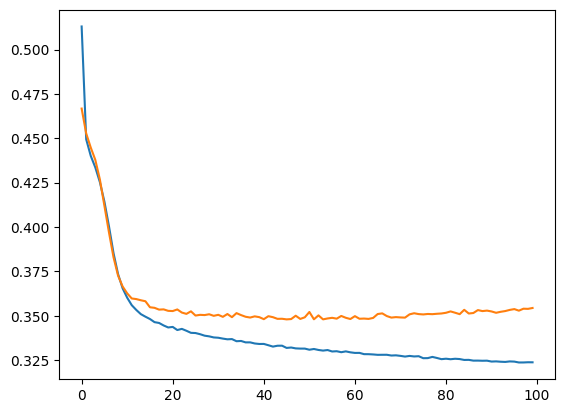

In [42]:
plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])

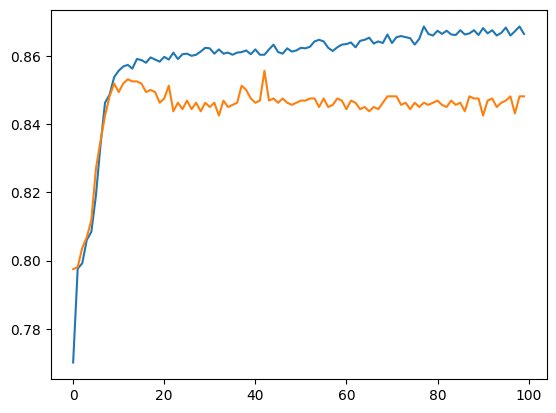

In [43]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])

In [44]:
import pickle

filename = "trained_model.sav"
pickle.dump(model_2,open(filename,"wb"))

filename_sc = "scaler.pkl"
pickle.dump(scaler,open(filename_sc,"wb"))

In [45]:
# loading the model

loaded_model = pickle.load(open("/content/trained_model.sav","rb"))

loaded_scaler = pickle.load(open("/content/scaler.pkl","rb"))